## HYPOTHESE NULLE (Ho) ET HYPOTHESE ALTERNATIVE (Ha)

Le but du test d'hypothèse est de répondre à la question: «Compte tenu d'un échantillon et d'un effet apparent, quelle est la probabilité de voir un tel effet par hasard ?»

- La première étape consiste à quantifier la taille de l'effet apparent en choisissant une statistique de test. Rappelons qu'une statistique de test est un nombre unique qui peut être calculé à partir des données observées mais à partir des données simulées sous l'hypothèse nulle. La statistique de test peut être n'importe quel paramètre statistique (moyenne, médiane, etc).
- L'étape suivante consiste à définir une hypothèse nulle (Ho) et une hypothèse alternative (Ha). L'hypothèse nulle est un modèle du système basé sur l'hypothèse que l'effet apparent n'est pas réel. Concrètement et de manière pratique, l'hypothèse nulle est l'affirmation qui n'est pas intéressante. L'hypothèse alternative est l'affirmation correspondante à l'hypothèse de recherche. Presque toujours le but est de réfuter l'hypothèse nulle et donc d'accepter que l'hypothèse alternative est vraie. Voici deux exemples pour vous aider à comprendre Ho et Ha.

##### Exemple 1 :

Une société biotechnologique tente de faire valider son nouveau vaccin A contre la grippe par l'OMS. Actuellement la plupart des médecins prescrivent le vaccin B contre la grippe. Pour cette situation, l'hypothèse nulle est : "le vaccin A a la même efficacité que le vaccin B pour prévenir la grippe" et l'hypothèse alternative est : "le vaccin A est plus efficace que le vaccin B pour prévenir la grippe".

##### Exemple 2:

Vous menez une étude sur la santé des habitants d'une ville et vous avez à votre disposition un échantillon de données de deux variables : le tour de taille en cm et le poids en Kg. Vous calculez le coefficient de corrélation de Pearson et le résultat indique qu'il y a une forte corrélation entre le tour de taille et le poids. Est-ce que cette corrélation est réelle ou est-ce qu'elle aurait pu se produire par hasard ? Dans ce cas, l'hypothèse nulle de votre test statistique sera : "il n'y a pas de corrélation entre le tour de taille et le poids" et l'hypothèse alternative sera : "il existe une corrélation entre le tour de taille et le poids".
- La dernière étape est de calculer la p-valeur, qui est la probabilité que l'hypothèse nulle soit vraie, et interprétez le résultat, si la p-valeur est faible, l'effet apparent observé est dit statistiquement significatif, ce qui signifie que vous rejetez l'hypothèse nulle et acceptez donc l'hypothèse alternative. Traditionnellement, on rejette l'hypothèse nulle lorsque p-valeur est inférieur à 0,05 (seuil de 5%). Ce seuil de 5% est subjectif mais pas dénudé de sens. L'explication de ce seuil n'est pas l'objectif de cette formation.



## QUELQUES TESTS STATISTIQUES

In [156]:
from warnings import filterwarnings
filterwarnings('ignore')  # code optionnel

## Importation des outils et des données

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')

# ?pd.pivot_table

In [158]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [159]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [160]:
tips_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## La couleur affecte-t-il le prix des dimants ?

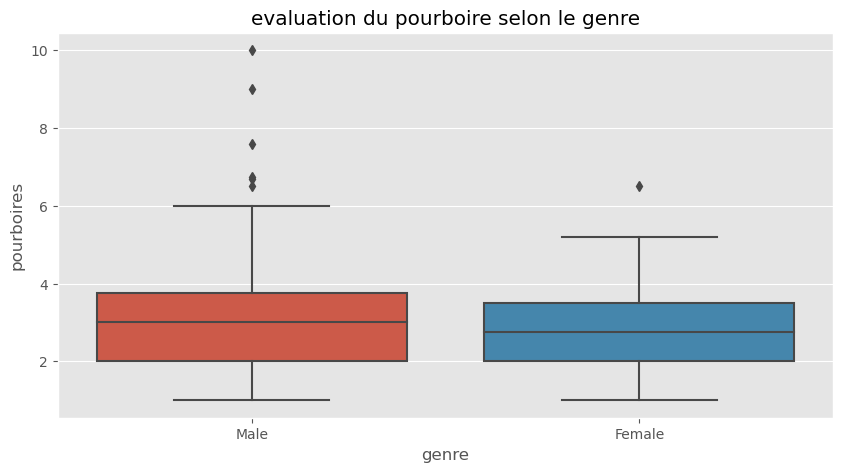

In [161]:
# Visualisation des pourboires en fonction du genre (Tip = pourboire)

plt.figure(figsize=(10,5))

sns.boxplot( x = 'sex', y = 'tip', data = tips_df)
plt.xlabel('genre')
plt.ylabel('pourboires')
plt.title("evaluation du pourboire selon le genre")
plt.show()

# Selon ce graphique les hommes donnent beaucoup de pourboire que les femmes 

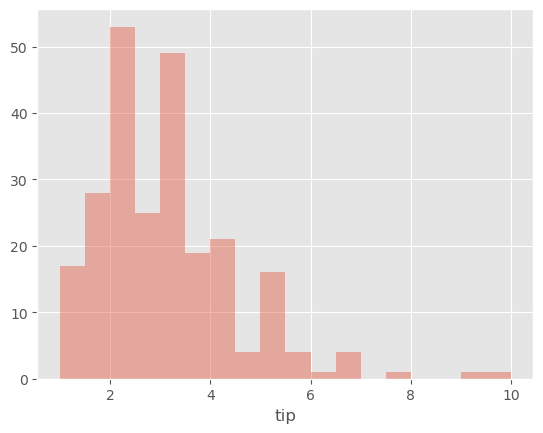

In [162]:
# Histogramme de la viariable "Price"

sns.distplot(tips_df['tip'], kde=False);

# l'histogramme nous montre que la distribution est asymétrie posiitive et étalé vers la droite
# cette distribution ne suit probablement pas une loi normal, nous allons la verifier avec les célèbres test de Normalité

L'hypothese nulle c'est l'hypothese qui n'est pas interessante. Ici mon hypothese nulle est qu'il n'y a aucun lien entre les pourboire et le genre des clients.
L'hypothese alternative serait qu'il y a un lien entre les pourboire et le genre des clients.

## Test de correlation parametrique

In [163]:
# Test de Normalité de Jarque-Bera

stats.jarque_bera(tips_df['tip'])

# La statistique de Jarque-Bera est de 214.35 et la pvalue=0.0, pvalue < 0.05 . Selon le test de Jarque-Bera 
# la distibution des pourboire(tip) ne suit pas une loi normal

Jarque_beraResult(statistic=214.3543468872759, pvalue=0.0)

In [164]:
# Test de Normalité de Shapiro-Wilk

stats.shapiro(tips_df['tip'])

# il n'y a pas de grande difference avec le test de Jarque-Bera 

ShapiroResult(statistic=0.8978114128112793, pvalue=8.200817629144819e-12)

In [165]:
# Test d'egalité des Variances 
   # On va verifier si les variances des deux groupes sont egales c'est a dire hommes et femmes
    
stats.levene(tips_df[tips_df.sex == 'Female']['tip'], tips_df[tips_df.sex == 'Male']['tip'], center = 'mean')

# La Pvaleur > 0.05 donc nous ne pouvons pas rejeter l'hypothese nulle des pourboire des hommes et des femmes est égale 

LeveneResult(statistic=2.357211366999719, pvalue=0.1260112815339025)

In [166]:
# Test de Student ( ici on le fait pour des raison pedagogique)

# pour faire le test de Student il y a des hypothese a respecté : la distribution doit suivre une loi normal
# 1- La variable continue doit avoire une distribution normal
# 2- La variable categoriel doit avoir deux modalité ou groupe(exemple : homme et femme) et chaque observation doit avoir 
# un seul groupe. par exemple un homme peu pas etre a la foi homme et femme


stats.ttest_ind(tips_df[tips_df.sex == 'Female']['tip'], tips_df[tips_df.sex == 'Male']['tip'], equal_var=True)

Ttest_indResult(statistic=-1.387859705421269, pvalue=0.16645623503456755)

Ici la Pvalue > 0.05 donc nous ne pouvons pas rejeter l'hypothese nulle et admettre qu'il existe une difference statistiquement significative entre les pourboire et le genre des clients.

In [167]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## La facture total(total_bill) des clients differe-t-ils selon leurs tailles(size)

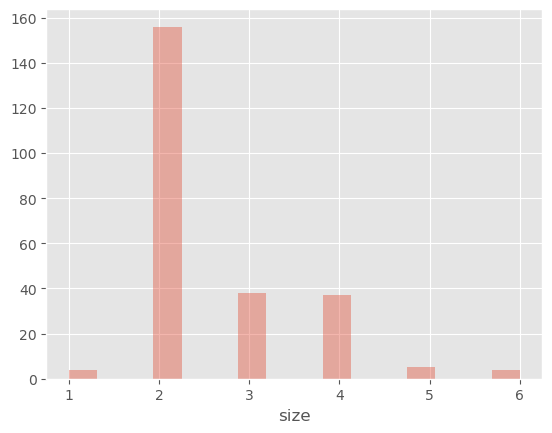

In [168]:
# Distibution des tailles

sns.distplot(tips_df['size'], kde=False);

In [169]:
# Creation des categories de taille 

tips_df.loc[(tips_df['size'] <= 3), 'size_group'] = "compris entre 0m et 3m de taille"

tips_df.loc[(tips_df['size'] > 3) & (tips_df['size'] < 5), 'size_group'] = "compris entre 3m et 5m"

tips_df.loc[(tips_df['size'] > 5), 'size_group'] = "plus de 5m de taille"

tips_df['size_group']

0      compris entre 0m et 3m de taille
1      compris entre 0m et 3m de taille
2      compris entre 0m et 3m de taille
3      compris entre 0m et 3m de taille
4                compris entre 3m et 5m
                     ...               
239    compris entre 0m et 3m de taille
240    compris entre 0m et 3m de taille
241    compris entre 0m et 3m de taille
242    compris entre 0m et 3m de taille
243    compris entre 0m et 3m de taille
Name: size_group, Length: 244, dtype: object

In [170]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,size_group
0,16.99,1.01,Female,No,Sun,Dinner,2,compris entre 0m et 3m de taille
1,10.34,1.66,Male,No,Sun,Dinner,3,compris entre 0m et 3m de taille
2,21.01,3.50,Male,No,Sun,Dinner,3,compris entre 0m et 3m de taille
3,23.68,3.31,Male,No,Sun,Dinner,2,compris entre 0m et 3m de taille
4,24.59,3.61,Female,No,Sun,Dinner,4,compris entre 3m et 5m


In [171]:
# Test d'egalité des variance

stats.levene(tips_df[tips_df.size_group == "compris entre 0m et 3m de taille"]['size'], 
                     tips_df[tips_df.size_group == "compris entre 3m et 5m"]['size'], 
                             tips_df[tips_df.size_group == "plus de 5m de taille"]['size'], center = 'mean') 

LeveneResult(statistic=25.08769598754709, pvalue=1.3213155975179038e-10)

Nous remarquons que la Pvalue < 0.05 donc nous pouvons rejeter l'hypothese de l'egalité des variances.
- Pour des raisons pedagogique nous poursuivons en supposant que les VARIANCES sont egales. ceci pour demontrer comment implementer l'ANOVA dans python.


### TEST ANOVA

In [172]:
# On va attribuer des noms a nos Test d'egalité des variance pour faciciler l'implementation dans ANOVA

taille_zero_trois = tips_df[tips_df.size_group == "compris entre 0m et 3m de taille"]['size']
taille_trois_cinq = tips_df[tips_df.size_group == "compris entre 3m et 5m"]['size']
taille_cinq_plus = tips_df[tips_df.size_group == "plus de 5m de taille"]['size']

In [173]:
# One-way-ANOVA ou analyse unidimentional de la variance
 # en Statistique l'analyse unidimentional de la variance est une technique qui peu etres utliser pour comparer
   # les moyennes deux echatillons ou plus en utilisant une distribution F

stats.f_oneway(taille_zero_trois, taille_trois_cinq, taille_cinq_plus)

F_onewayResult(statistic=500.9021528248516, pvalue=1.1767430565999845e-85)

Nous remarquons que la Pvalue < 0.05 donc on rejete l'hypothese nulle et on admet qu'au moins l'une des moyennes differes. En somme il n'y a pas egalité de moyenne entre les 3 groupes. 
Alors nous pouvons conclure que La facture total des clmients differe selon leurs tailles

## Y-a-t-il une relation entre les fumeurs(smoker) et le sexe

In [174]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,size_group
0,16.99,1.01,Female,No,Sun,Dinner,2,compris entre 0m et 3m de taille
1,10.34,1.66,Male,No,Sun,Dinner,3,compris entre 0m et 3m de taille
2,21.01,3.50,Male,No,Sun,Dinner,3,compris entre 0m et 3m de taille
3,23.68,3.31,Male,No,Sun,Dinner,2,compris entre 0m et 3m de taille
4,24.59,3.61,Female,No,Sun,Dinner,4,compris entre 3m et 5m


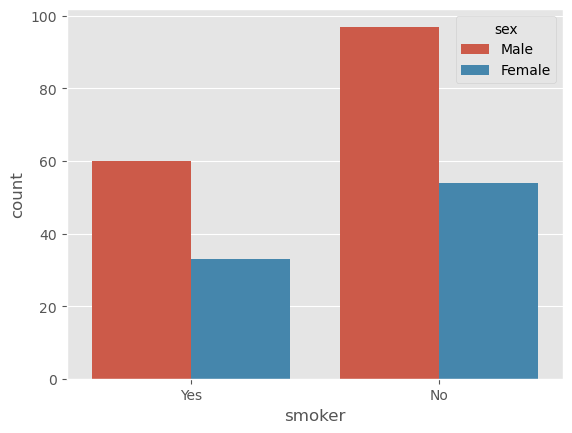

In [175]:
# Diagramme a barre de la variable smoker

sns.countplot(x = 'smoker', hue = 'sex', data = tips_df);

HIPOTHESE
- hypothese nulle(Ho) : la proportion de client fumeur est independant du sexe
- hypothese alternative(Ha) : la proportion de client fumeur est corrolé ou associé au sexe

In [176]:
# Tableau de contingence entre les variable "smoker" et sex

cont_table = pd.crosstab(tips_df['sex'], tips_df['smoker'])
cont_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [188]:
# Test du Chi2

stats.chi2_contingency(cont_table, correction = True)


# Lorsque les données sont collectées, la valeur-p est calculée et la décision suivante est prise :

# si elle est inférieure à 0.05, on rejette l'hypothèse nulle au profit de l'hypothèse alternative ;
# si elle est supérieure à 0.05, on rejette l'hypothèse alternative au profit de l'hypothèse nulle.

(0.0,
 1.0,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

ici la Pvalue = 1.0, la Pvalue < 0.05 donc on rejete l'hypothese nulle selon laquel  la proportion de client fumeur est independant du sexe. alors nous admettons que les clients fumeurs sont corrélé selon leur sexe.

DANS L'EXERCIE COUR: LA Pvalue = 0.137, la Pvalue > 0.05 donc nous ne pouvons pas rejeter l'hopothese nulle selon laquelle ....

## Le chiffre d'affaire total(total_bill) est-t-il correlé au pourboire(tips)

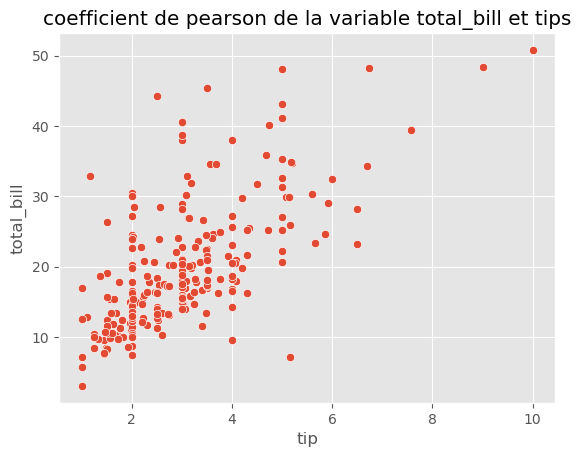

In [178]:
# relation entre la variable "total_bill" et "tips"

sns.scatterplot('tip','total_bill', data = tips_df)

plt.title("coefficient de pearson de la variable total_bill et tips")
plt.show()

HIPOTHESE
- hypothese nulle(Ho) : les deux variables sont correlées
- hypothese alternative(Ha) : les deux variables ne sont pas correlées

In [179]:
stats.pearsonr(tips_df['tip'], tips_df['total_bill'])

PearsonRResult(statistic=0.6757341092113645, pvalue=6.692470646863477e-34)

la Pvalue < 0.05 donc on rejete l'hypothese nulle selon laquelle le chiffre d'affaire n'est pas correlé au pourboire et concluant qu'il existe une la relation statistiquement significative entre le chiffre d'affaires et le pourboire des clients. de plus coefficient de pearson = 0.6 ce qui montre que la correlation est faible entre les 2 variables

On vien de terminer les Test de correlation parametrique
les Test de correlation parametrique de pearson sont appliqués lorsque les variables sont normalement distribuées

## Test de correlation non parametrique : lorsque les variables ne sont pas normalement distribuées

## Nouveau dataframe

In [180]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [181]:
mpg_df = sns.load_dataset('mpg')
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [182]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [183]:
mpg_df.loc[mpg_df['horsepower'].isnull(), 'horsepower'] = round(mpg_df['horsepower'].mean(),1)

# pour remplacé les valeurs manquantes quantitative d'une dataFrame: dataframe.fillna(dataframe.maen(), inplace=True) 

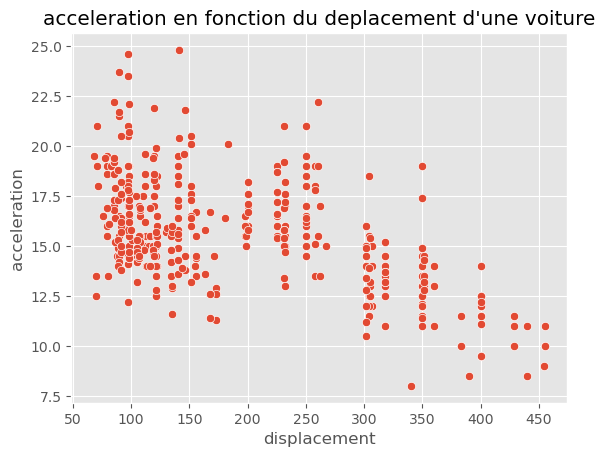

In [184]:
# Correlation entre les variables "displacement" et "acceleration"

sns.scatterplot(x = 'displacement',y = 'acceleration', data = mpg_df)

plt.title("acceleration en fonction du deplacement d'une voiture")
plt.show()

Plus une voiture se deplace sur de longue distance, elle accelère moins 

In [185]:
# Coéfficient de corrélation de pearson

stats.pearsonr(mpg_df['displacement'], mpg_df['acceleration'])

PearsonRResult(statistic=-0.5436840835009299, pvalue=5.42087736592988e-32)

- Si la P-valeur est inferieur à 0.05 on peu rejeter l'hypothese nulle
- Si la P-valeur est superieur à 0.05 on accepte l'hypothese nulle. en gros on admet qu'y a pas d'hypothese nulle en ses deux variables.

La corrélation est egale à -0.54. c'est ce que nous montre les nuages de point plus en haut. une corrélation fortement négative et la P-valeur est inferieur à 0.05. donc nous pouvons rejeter l'hypothese nulle selon laquelle il n'y a pas de correlation entre les deux variables. Ce qui voudrait dire qu'il y a belle et bien une corrélation statistiquement significative entre l'acceleration en fonction du deplacement d'une voiture 

#### Nous allons prouver par un test non parametrique  l'hypothese nulle selon laquelle il n'y a pas de correlation entre les deux variables

In [187]:
# Transformation des variables en tableaux Numpy

displacement = np.array(mpg_df['displacement'])

acceleration = np.array(mpg_df['acceleration'])

# Nombre total de simulation à faire

N = 10000

# Initialisation du tableau de stockage des repliques de permutation 
     # Ou tableau numpy vide pour stocker les statistique que nous allons calculer
    
perm_replicates = np.empty(N)    # perm = permutation et replicates = repliques

# Simulation

for i in range(N):
    
    # Permutation des valeurs de "displacement"
    # (Nous pouvons choisir de permuter "acceleration". c'est l'un ou l'autre, on choisi ce l'un des deux.)
    
    displacement_permuted = np.random.permutation(displacement)
    
    # Calcule la replique de permutation
    # (Le Coéfficient de pearson de chaque echantillon de permutation)
    
    perm_replicates[i] = stats.pearsonr(displacement_permuted, acceleration)[0]   # [0] : pour afficher unuquement Le 
                                                                                    # Coéfficient de pearson
        
# Calcule la P-valeur
  # P-valeur sera une frequence, on fera la somme pour compter le nombre de foi le terme replicates du coéfficient de 
    # corrélation des echatillons de permutation est superieur ou égale à la valeur absolue du coéfficient de 
    # corrélation observer plus haut ( PearsonRResult(statistic=-0.5436840835009299, pvalue=5.42087736592988e-32))
    
p = np.sum(perm_replicates >= -stats.pearsonr(mpg_df['displacement'], mpg_df['acceleration'])[0])  
                         # le signe de soustration(-) parceque le coéfficient de corrélation observer est negatif
    
        # N'oublions pas qu'ici le coéfficient de pearson observer est negatif
        
print('p-valeur =', p)

p-valeur = 0


- p-valeur = 0 cela voudrait dire qu'il y a 0% de chance que l'hypothese nulle soit vrai. donc il existe une relation statistiquement significative entre l'acceleration d'une voiture et son deplacement

l'hypothese nulle est qu'il n'y a pas de corrélation entre acceleration d'une voiture selon son deplacement